<a href="https://colab.research.google.com/github/racoope70/daytrading-with-ml/blob/main/train_sarsa_multi_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance xgboost joblib tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 15.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-c

In [2]:
!pip uninstall -y dask cudf-cu12 cuml-cu12 rapids-dask-dependency pylibraft-cu12 pylibcudf-cu12 numba stable-baselines3 gymnasium gym-anytrading

Found existing installation: dask 2024.12.1
Uninstalling dask-2024.12.1:
  Successfully uninstalled dask-2024.12.1
Found existing installation: cudf-cu12 25.2.1
Uninstalling cudf-cu12-25.2.1:
  Successfully uninstalled cudf-cu12-25.2.1
Found existing installation: cuml-cu12 25.2.1
Uninstalling cuml-cu12-25.2.1:
  Successfully uninstalled cuml-cu12-25.2.1
Found existing installation: rapids-dask-dependency 25.2.0
Uninstalling rapids-dask-dependency-25.2.0:
  Successfully uninstalled rapids-dask-dependency-25.2.0
Found existing installation: pylibraft-cu12 25.2.0
Uninstalling pylibraft-cu12-25.2.0:
  Successfully uninstalled pylibraft-cu12-25.2.0
Found existing installation: pylibcudf-cu12 25.2.1
Uninstalling pylibcudf-cu12-25.2.1:
  Successfully uninstalled pylibcudf-cu12-25.2.1
Found existing installation: numba 0.60.0
Uninstalling numba-0.60.0:
  Successfully uninstalled numba-0.60.0
Found existing installation: stable_baselines3 2.6.0
Uninstalling stable_baselines3-2.6.0:
  Successfu

In [3]:
!pip install --upgrade --force-reinstall \
    dask==2024.11.2 \
    rapids-dask-dependency==24.12.0 \
    cudf-cu12==24.12.0 \
    cuml-cu12==24.12.0 \
    pylibraft-cu12==24.12.0 \
    pylibcudf-cu12==24.12.0 \
    numba==0.61.0 \
    stable-baselines3[extra] \
    gymnasium==0.29.1 \
    gym-anytrading==2.0.0


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached gym_anytrading-2.0.0-py3-none-any.whl.metadata (292 bytes)
  Using cached stable_baselines3-2.6.0-py3-none-any.whl.metadata (4.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.4 MB/s eta 

In [1]:
import cudf, cuml, dask, stable_baselines3, gymnasium
import numba, pandas, numpy, scipy

print("cuDF Version:", cudf.__version__)
print("cuML Version:", cuml.__version__)
print("Dask Version:", dask.__version__)
print("Stable Baselines3 Installed:", stable_baselines3.__version__)
print("Gymnasium Version:", gymnasium.__version__)
print("NumPy Version:", numpy.__version__)
print("SciPy Version:", scipy.__version__)
print("Pandas Version:", pandas.__version__)

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

cuDF Version: 24.12.00
cuML Version: 24.12.00
Dask Version: 2024.11.2
Stable Baselines3 Installed: 2.6.0
Gymnasium Version: 0.29.1
NumPy Version: 2.1.3
SciPy Version: 1.15.2
Pandas Version: 2.2.3


In [2]:
!nvidia-smi

Thu Apr 10 14:59:05 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   29C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import tensorflow as tf
print("TF Version:", tf.__version__)
print("Available GPUs:", tf.config.list_physical_devices('GPU'))

TF Version: 2.18.0
Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
Step 2: Set Environment Paths for CUDA 11.8
import os
os.environ['CUDA_HOME'] = '/usr/local/cuda-11.8'
os.environ['PATH'] += ':/usr/local/cuda-11.8/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-11.8/lib64'

In [5]:

try:
    df = cudf.DataFrame({'col1': [1, 2, 3], 'col2': [4, 5, 6]})
    print("cuDF is working and using GPU!")
except Exception as e:
    print(f"cuDF GPU check failed: {e}")



cuDF is working and using GPU!


In [6]:
import os
import time
import gc
import numpy as np
import pandas as pd
import xgboost as xgb
import yfinance as yf
import gymnasium as gym  Use gymnasium instead of gym
import gym_anytrading
from gymnasium.envs.registration import registry, register
import matplotlib.pyplot as plt

Prevent cuDF from taking all GPU memory
os.environ["RAPIDS_NO_INITIALIZE"] = "1"

RAPIDS & GPU-based Libraries (Try-Except to Avoid CPU Errors)
try:
    import cudf
    import cuml
    from cuml.ensemble import RandomForestClassifier
    from cuml.metrics import accuracy_score
    GPU_AVAILABLE = True
    print("cuDF & cuML are available and running on GPU.")
except ImportError:
    print("cuDF/cuML not available. Switching to CPU mode.")
    GPU_AVAILABLE = False

Reinforcement Learning & Trading
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

TensorFlow & GPU Optimization
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

Ensure TensorFlow GPU Memory Allocation is Configured
gpus = tf.config.list_physical_devices("GPU")
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)  Prevents full allocation
        print("TensorFlow GPU memory growth enabled")
    except RuntimeError as e:
        print(f"TensorFlow GPU memory issue: {e}")

Google Drive Access (for Colab)
from google.colab import drive


cuDF & cuML are available and running on GPU.
TensorFlow GPU memory growth enabled


In [7]:
import os
import time
import numpy as np
import pandas as pd
import yfinance as yf

Ticker List
ticker_list = [
    'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ',
    'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO',
    'BAC', 'ABBV', 'AVGO', 'PFE', 'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT',
    'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC', 'QCOM', 'NEE', 'AMD', 'TXN',
    'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX', 'IBM',
    'GE', 'SBUX', 'ORCL'
]

CONFIG = {
    'period': '720d',
    'interval': '1h',
    'strategy_name': "sac_ppo_td3_multi_stock_v1"
}

1.Download Stock Data
def download_stock_data(ticker, period="720d", interval="1h", max_retries=5):
    for attempt in range(1, max_retries + 1):
        try:
            print(f"Attempt {attempt}: Downloading {ticker}...")
            df = yf.download(ticker, period=period, interval=interval)
            if not df.empty:
                df.reset_index(inplace=True)
                df['Symbol'] = ticker
                return df
            raise ValueError("Empty data")
        except Exception as e:
            print(f"Error: {e}. Retrying in {attempt * 5} sec...")
            time.sleep(attempt * 5)
    print(f"Failed to download {ticker}")
    return None

2.Feature Engineering
def compute_enhanced_features(df):
    df = df.copy()
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    df = df.loc[:, ~df.columns.duplicated()]

    df['SMA_20'] = df['Close'].rolling(20).mean()
    df['STD_20'] = df['Close'].rolling(20).std()
    df['Upper_Band'] = df['SMA_20'] + 2 * df['STD_20']
    df['Lower_Band'] = df['SMA_20'] - 2 * df['STD_20']
    df['Lowest_Low'] = df['Low'].rolling(14).min()
    df['Highest_High'] = df['High'].rolling(14).max()
    denom = (df['Highest_High'] - df['Lowest_Low']).replace(0, np.nan)
    df['Stoch'] = ((df['Close'] - df['Lowest_Low']) / denom) * 100
    df['ROC'] = df['Close'].pct_change(10)
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).cumsum()
    typical_price = (df['High'] + df['Low'] + df['Close']) / 3
    df['CCI'] = (typical_price - typical_price.rolling(20).mean()) / (0.015 * typical_price.rolling(20).std())
    df['PROC'] = ((df['Close'] - df['Close'].shift(12)) / df['Close'].shift(12)) * 100
    df['Rolling_Mean_50'] = df['Close'].rolling(50).mean()
    df['Expanding_Mean'] = df['Close'].expanding().mean()
    df['EMA_10'] = df['Close'].ewm(span=10).mean()
    df['EMA_50'] = df['Close'].ewm(span=50).mean()
    df['MACD_Line'] = df['Close'].ewm(span=12).mean() - df['Close'].ewm(span=26).mean()
    df['MACD_Signal'] = df['MACD_Line'].ewm(span=9).mean()
    df['MACD_Hist'] = df['MACD_Line'] - df['MACD_Signal']
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = -delta.where(delta < 0, 0).rolling(14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    df['True_Range'] = df[['High', 'Low', 'Close']].apply(
        lambda x: max(x.iloc[0] - x.iloc[1], abs(x.iloc[0] - x.iloc[2]), abs(x.iloc[1] - x.iloc[2])), axis=1)
    df['ATR'] = df['True_Range'].rolling(14).mean()
    df['+DM'] = np.where((df['High'].diff() > df['Low'].diff()) & (df['High'].diff() > 0), df['High'].diff(), 0)
    df['-DM'] = np.where((df['Low'].diff() > df['High'].diff()) & (df['Low'].diff() > 0), df['Low'].diff(), 0)
    df['+DI'] = 100 * df['+DM'].rolling(14).mean() / df['ATR']
    df['-DI'] = 100 * df['-DM'].rolling(14).mean() / df['ATR']
    df['ADX'] = abs(df['+DI'] - df['-DI']).rolling(14).mean()
    df['Volume_Avg'] = df['Volume'].rolling(20).mean()
    df['Volume_Change'] = df['Volume'].pct_change()
    df['Volume_Change_MA'] = df['Volume_Change'].rolling(10).mean()
    df['Volume_Change_Ratio'] = df['Volume_Change'] / df['Volume_Change'].shift(1)
    df['Relative_Volume'] = df['Volume'] / df['Volume_Avg']
    df['Trailing_Stop'] = np.minimum(df['Close'] * 0.985, df['Close'] - (df['ATR'] * 0.3))
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    return df

3.Label Creation
def create_trading_labels(df, label_type="multiclass", return_threshold=0.02, shift_period=10):
    df = df.copy()
    df['Future_Close'] = df['Close'].shift(-shift_period)
    df['Return'] = (df['Future_Close'] - df['Close']) / df['Close']

    if label_type == "multiclass":
        df['Target'] = np.select(
            [df['Return'] > return_threshold, df['Return'] < -return_threshold],
            [1, -1],
            default=0
        )
    elif label_type == "binary":
        df['Target'] = np.where(df['Return'] > return_threshold, 1, 0)
    elif label_type == "regression":
        df['Target'] = df['Return']
    else:
        raise ValueError("Invalid label_type. Use 'multiclass', 'binary', or 'regression'.")

    df.drop(columns=["Future_Close", "Return"], inplace=True, errors='ignore')
    return df

4.Run Pipeline for All Stocks
all_dfs = []

for ticker in ticker_list:
    df_single = download_stock_data(ticker, period=CONFIG['period'], interval=CONFIG['interval'])
    if df_single is not None:
        try:
            df_features = compute_enhanced_features(df_single)
            df_labeled = create_trading_labels(df_features, label_type="multiclass")
            all_dfs.append(df_labeled)
        except Exception as e:
            print(f"Feature engineering or labeling failed for {ticker}: {e}")
    else:
        print(f"Failed to download {ticker}")

5. Combine & Save
if all_dfs:
    df = pd.concat(all_dfs, ignore_index=True)
    print(f"Combined dataset created with shape: {df.shape}")
    df.to_csv("multi_stock_feature_engineered_dataset.csv", index=False)
    print("Saved locally as multi_stock_feature_engineered_dataset.csv")

    Google Drive path (optional)
    drive_path = "/content/drive/MyDrive/trading_data/"
    os.makedirs(drive_path, exist_ok=True)
    df.to_csv(os.path.join(drive_path, "multi_stock_feature_engineered_dataset.csv"), index=False)
    print(f"Also saved to: {drive_path}multi_stock_feature_engineered_dataset.csv")
else:
    print("No data was processed.")


Attempt 1: Downloading AAPL...
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading TSLA...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading MSFT...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading GOOGL...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading AMZN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading NVDA...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading META...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading BRK-B...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading JPM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading JNJ...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading XOM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading V...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading PG...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading UNH...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading MA...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading HD...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading LLY...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading MRK...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading PEP...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading KO...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading BAC...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ABBV...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading AVGO...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading PFE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading COST...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading CSCO...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading TMO...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ABT...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ACN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading WMT...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading MCD...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ADBE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading DHR...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading CRM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading NKE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading INTC...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading QCOM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading NEE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading AMD...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading TXN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading AMGN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading UPS...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading LIN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading PM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading UNP...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading BMY...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading LOW...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading RTX...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading CVX...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading IBM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading GE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading SBUX...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ORCL...


[*********************100%***********************]  1 of 1 completed


Combined dataset created with shape: (262603, 40)
Saved locally as multi_stock_feature_engineered_dataset.csv
Also saved to: /content/drive/MyDrive/trading_data/multi_stock_feature_engineered_dataset.csv


In [8]:
Ensure Column Names Are Flattened Correctly
df.columns = df.columns.get_level_values(0) if isinstance(df.columns, pd.MultiIndex) else df.columns

Remove Named Index (if exists)
df.columns.name = None  Remove 'Price' as the column index name

Verify Columns After Processing
print("Final Columns in df:", df.columns)

Ensure 'Close' Exists Before Proceeding
if 'Close' not in df.columns:
    raise KeyError("Column 'Close' not found in the DataFrame after processing.")

Load Your Dataset
data = df.copy()  Ensure 'df' is loaded before this step

Add Technical Indicators (RSI & MACD)
def compute_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))  Compute RSI
    return rsi  Return computed RSI values

def compute_macd(data, short=12, long=26, signal=9):
    short_ema = data['Close'].ewm(span=short, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long, adjust=False).mean()
    data['MACD'] = short_ema - long_ema
    data['MACD_Signal'] = data['MACD'].ewm(span=signal, adjust=False).mean()

aaply Indicators to `data`
data['RSI'] = compute_rsi(data)  Ensure RSI is assigned properly
compute_macd(data)  Compute MACD in place

Drop NaN values to avoid errors in training
data.dropna(inplace=True)

Verify if 'RSI' column exists
print(data.head())  Print first few rows to check if RSI is present

Drop non-numeric columns before normalization (keep index intact)
data_numeric = data.select_dtypes(include=[np.number])  Keep only numeric columns

Normalize only numeric data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_numeric)

Convert back to DataFrame and retain the original index
scaled_df = pd.DataFrame(scaled_data, columns=data_numeric.columns, index=data.index)

Check if the data looks correct
print(scaled_df.head())


Final Columns in df: Index(['Datetime', 'Close', 'High', 'Low', 'Open', 'Volume', 'Symbol',
       'SMA_20', 'STD_20', 'Upper_Band', 'Lower_Band', 'Lowest_Low',
       'Highest_High', 'Stoch', 'ROC', 'OBV', 'CCI', 'PROC', 'Rolling_Mean_50',
       'Expanding_Mean', 'EMA_10', 'EMA_50', 'MACD_Line', 'MACD_Signal',
       'MACD_Hist', 'RSI', 'True_Range', 'ATR', '+DM', '-DM', '+DI', '-DI',
       'ADX', 'Volume_Avg', 'Volume_Change', 'Volume_Change_MA',
       'Volume_Change_Ratio', 'Relative_Volume', 'Trailing_Stop', 'Target'],
      dtype='object')
                    Datetime       Close        High         Low        Open  \
13 2022-06-09 19:30:00+00:00  142.600006  143.800003  142.529999  143.619995   
14 2022-06-10 13:30:00+00:00  137.490005  140.759995  137.460007  140.250000   
15 2022-06-10 14:30:00+00:00  137.399994  138.539001  137.270004  137.489899   
16 2022-06-10 15:30:00+00:00  137.975006  138.070007  137.289993  137.410995   
17 2022-06-10 16:30:00+00:00  138.089996  138.

In [13]:
import os
import gc
import numpy as np
import pandas as pd
import yfinance as yf
import gymnasium as gym
import gym_anytrading
from stable_baselines3.common.vec_env import DummyVecEnv

#CONFIGURATION ====
test_mode = False
test_symbol = 'AAPL'
strategy_name = "sarsa_multi_stock"
ticker_list = [
    'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ',
    'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO', 'BAC', 'ABBV', 'AVGO', 'PFE',
    'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT', 'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC',
    'QCOM', 'NEE', 'AMD', 'TXN', 'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX',
    'IBM', 'GE', 'SBUX', 'ORCL'
]
CONFIG = {
    'period': '720d',
    'interval': '1h',
    'window_size': 10
}
symbols_to_run = [test_symbol] if test_mode else ticker_list
results_dir = "/content/drive/MyDrive/TradingResults_SARSA"
drive_path = "/content/drive/MyDrive/trading_data"
os.makedirs(results_dir, exist_ok=True)
os.makedirs(drive_path, exist_ok=True)

print("Test mode ON" if test_mode else f"Running SARSA for {len(symbols_to_run)} stocks.")

#INDICATORS ====
def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0).rolling(window=period).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

def compute_macd(series, short=12, long=26, signal=9):
    ema_short = series.ewm(span=short, adjust=False).mean()
    ema_long = series.ewm(span=long, adjust=False).mean()
    macd = ema_short - ema_long
    signal_line = macd.ewm(span=signal, adjust=False).mean()
    return macd, signal_line, macd - signal_line

#DATA LOADER ====
def load_or_generate_data_fixed(ticker, drive_path, config):
    path = f"{drive_path}/{ticker}_features.csv"
    df = None

    if os.path.exists(path):
        try:
            df = pd.read_csv(path)
            for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
                df[col] = pd.to_numeric(df[col], errors='coerce')
            if df.shape[0] < 100 or len(df.columns) < 5:
                raise ValueError("Bad CSV structure")
        except Exception as e:
            print(f"{ticker}: CSV load failed or bad structure. Re-downloading. Reason: {e}")
            df = None

    if df is None:
        df = yf.download(ticker, period=config['period'], interval=config['interval'])
        if df.empty or len(df) < 100:
            return None
        df.reset_index(drop=True, inplace=True)
        for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        df['EMA_10'] = df['Close'].ewm(span=10).mean()
        df['EMA_50'] = df['Close'].ewm(span=50).mean()
        df['RSI'] = compute_rsi(df['Close'])
        df['MACD'], _, _ = compute_macd(df['Close'])
        df.dropna(inplace=True)
        df.to_csv(path, index=False)

    df = df.loc[:, ~df.columns.duplicated()]
    required_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'EMA_10', 'EMA_50', 'RSI', 'MACD']

    print(f"{ticker}: df.dtypes before validation:\n{df.dtypes}")
    for col in required_cols:
        if col not in df.columns:
            print(f"{ticker}: Missing column {col}")
            return None
        if not pd.api.types.is_numeric_dtype(df[col]):
            print(f"{ticker}: {col} is not numeric")
            return None

    df.dropna(inplace=True)
    return df

#SARSA AGENT ====
class SARSAAgent:
    def __init__(self, state_size, action_size, alpha=0.1, gamma=0.95, epsilon=1.0, epsilon_decay=0.995, min_epsilon=0.01):
        self.state_size = state_size
        self.action_size = action_size
        self.q_table = np.zeros((state_size, action_size))
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.min_epsilon = min_epsilon
        self.portfolio_values = []

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.array([np.random.choice(self.action_size)])
        return np.array([np.argmax(self.q_table[state])])

    def update_q_table(self, state, action_scalar, reward, next_state, next_action_scalar):
        predict = self.q_table[state, action_scalar]
        target = reward + self.gamma * self.q_table[next_state, next_action_scalar]
        self.q_table[state, action_scalar] += self.alpha * (target - predict)

    def train(self, env, episodes=200, initial_balance=10000):
        for episode in range(episodes):
            reset_result = env.reset()
            state = reset_result[0] if isinstance(reset_result, tuple) else reset_result
            state = self.discretize_state(state)
            action = self.choose_action(state)
            done = False
            total_reward = 0.0
            balance = float(initial_balance)

            while not done:
                step_result = env.step(action)
                if len(step_result) == 4:
                    next_state, reward, done, _ = step_result
                else:
                    next_state, reward, terminated, truncated, _ = step_result
                    done = terminated or truncated

                reward = float(np.asarray(reward).item() if np.ndim(reward) > 0 else reward)
                next_state = self.discretize_state(next_state)
                next_action = self.choose_action(next_state)

                action_scalar = int(action.item()) if isinstance(action, np.ndarray) else int(action)
                next_action_scalar = int(next_action.item()) if isinstance(next_action, np.ndarray) else int(next_action)

                self.update_q_table(state, action_scalar, reward, next_state, next_action_scalar)

                balance += reward
                total_reward += reward
                self.portfolio_values.append(balance)

                state = next_state
                action = next_action

            self.epsilon = max(self.epsilon * self.epsilon_decay, self.min_epsilon)

            if episode % 10 == 0:
                gc.collect()
                print(f"Episode {episode}: Reward = {total_reward:.2f}, Balance = {balance:.2f}, Epsilon = {self.epsilon:.4f}")

    def discretize_state(self, state):
        return int(np.mean(state) * self.state_size) % self.state_size

#RUN SARSA FOR ALL TICKERS ====
for ticker in symbols_to_run:
    print(f"\nRunning SARSA for: {ticker}")
    df = load_or_generate_data_fixed(ticker, drive_path, CONFIG)
    if df is None or len(df) < 100:
        print(f"Skipping {ticker} due to data issue.")
        continue

    df = df.reset_index(drop=True)
    env = gym.make('stocks-v0', df=df, frame_bound=(CONFIG['window_size'], len(df)), window_size=CONFIG['window_size'])
    env = DummyVecEnv([lambda: env])

    state_size = 100
    action_size = env.action_space.n
    sarsa_agent = SARSAAgent(state_size, action_size)
    sarsa_agent.train(env, episodes=200)

    pd.DataFrame({'Portfolio Value': sarsa_agent.portfolio_values}).to_csv(
        f"{results_dir}/SARSA_{ticker}_portfolio.csv", index=False)
    print(f"Saved results for {ticker}")


Running SARSA for 53 stocks.

Running SARSA for: AAPL
AAPL: df.dtypes before validation:
Close     float64
High      float64
Low       float64
Open      float64
Volume    float64
EMA_10    float64
EMA_50    float64
RSI       float64
MACD      float64
dtype: object
Episode 0: Reward = 25.49, Balance = 10025.49, Epsilon = 0.9950
Episode 10: Reward = 11.38, Balance = 10011.38, Epsilon = 0.9464
Episode 20: Reward = 32.10, Balance = 10032.10, Epsilon = 0.9001
Episode 30: Reward = 27.17, Balance = 10027.17, Epsilon = 0.8561
Episode 40: Reward = 25.70, Balance = 10025.70, Epsilon = 0.8142
Episode 50: Reward = 9.78, Balance = 10009.78, Epsilon = 0.7744
Episode 60: Reward = -30.46, Balance = 9969.54, Epsilon = 0.7366
Episode 70: Reward = 7.60, Balance = 10007.60, Epsilon = 0.7005
Episode 80: Reward = 24.04, Balance = 10024.04, Epsilon = 0.6663
Episode 90: Reward = -63.95, Balance = 9936.05, Epsilon = 0.6337
Episode 100: Reward = 13.60, Balance = 10013.60, Epsilon = 0.6027
Episode 110: Reward = 

In [14]:
import glob

def evaluate_sarsa_results(results_dir):
    portfolio_files = sorted(glob.glob(f"{results_dir}/SARSA_*.csv"))
    results = []

    for filepath in portfolio_files:
        ticker = os.path.basename(filepath).split('_')[1]
        try:
            df = pd.read_csv(filepath)
            final_value = df['Portfolio Value'].iloc[-1]
            start_value = df['Portfolio Value'].iloc[0]
            returns = (final_value - start_value) / start_value
            results.append({
                'Ticker': ticker,
                'Start Value': start_value,
                'End Value': final_value,
                'Return %': round(returns * 100, 2)
            })
        except Exception as e:
            print(f"Error reading {filepath}: {e}")

    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by='Return %', ascending=False).reset_index(drop=True)

    print("\n📈 Top 5 Performing Stocks:")
    print(results_df.head(5).to_string(index=False))

    print("\nBottom 5 Performing Stocks:")
    print(results_df.tail(5).to_string(index=False))

    return results_df

Run evaluation
evaluation_df = evaluate_sarsa_results(results_dir)



📈 Top 5 Performing Stocks:
Ticker  Start Value    End Value  Return %
  META      10000.0 10299.102287      2.99
  COST      10000.0 10297.638611      2.98
 BRK-B      10000.0 10183.041351      1.83
    HD      10000.0 10181.843658      1.82
    GE      10000.0 10140.283520      1.40

Bottom 5 Performing Stocks:
Ticker  Start Value   End Value  Return %
   UPS      10000.0 9966.820015     -0.33
   NEE      10000.0 9965.271763     -0.35
   AMD      10000.0 9942.645756     -0.57
   NKE      10000.0 9940.178329     -0.60
   TMO      10000.0 9777.137115     -2.23


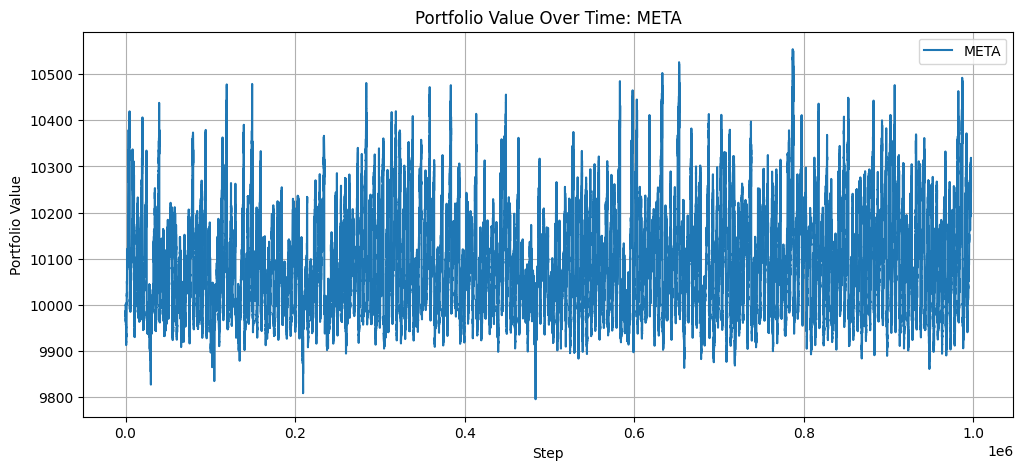

In [15]:
import matplotlib.pyplot as plt

def plot_top_performer(results_df, results_dir):
    top_ticker = results_df.iloc[0]['Ticker']
    path = f"{results_dir}/SARSA_{top_ticker}_portfolio.csv"
    df = pd.read_csv(path)

    plt.figure(figsize=(12, 5))
    plt.plot(df['Portfolio Value'], label=top_ticker)
    plt.title(f"Portfolio Value Over Time: {top_ticker}")
    plt.xlabel("Step")
    plt.ylabel("Portfolio Value")
    plt.grid(True)
    plt.legend()
    plt.show()

Plot the best performer
plot_top_performer(evaluation_df, results_dir)
